In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
df1 = pd.read_csv('playgolf.csv', delimiter='|')
df1

,Date,Outlook,Temperature,Humidity,Windy,Result
0,07-01-2014,sunny,85,85,False,Don't Play
1,07-02-2014,sunny,80,90,True,Don't Play
2,07-03-2014,overcast,83,78,False,Play
3,07-04-2014,rain,70,96,False,Play
4,07-05-2014,rain,68,80,False,Play
5,07-06-2014,rain,65,70,True,Don't Play
6,07-07-2014,overcast,64,65,True,Play
7,07-08-2014,sunny,72,95,False,Don't Play
8,07-09-2014,sunny,69,70,False,Play
9,07-10-2014,rain,75,80,False,Play


In [72]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
Date           14 non-null object
Outlook        14 non-null object
Temperature    14 non-null int64
Humidity       14 non-null int64
Windy          14 non-null bool
Result         14 non-null object
dtypes: bool(1), int64(2), object(3)
memory usage: 654.0+ bytes


In [73]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


In [74]:
df1['Date'] = pd.to_datetime(df1.Date)
df1

,Date,Outlook,Temperature,Humidity,Windy,Result
0,2014-07-01,sunny,85,85,False,Don't Play
1,2014-07-02,sunny,80,90,True,Don't Play
2,2014-07-03,overcast,83,78,False,Play
3,2014-07-04,rain,70,96,False,Play
4,2014-07-05,rain,68,80,False,Play
5,2014-07-06,rain,65,70,True,Don't Play
6,2014-07-07,overcast,64,65,True,Play
7,2014-07-08,sunny,72,95,False,Don't Play
8,2014-07-09,sunny,69,70,False,Play
9,2014-07-10,rain,75,80,False,Play


In [75]:
df1['Did_Play'] = df1.Result.map({"Play":1, "Don't Play":0})
df1

,Date,Outlook,Temperature,Humidity,Windy,Result,Did_Play
0,2014-07-01,sunny,85,85,False,Don't Play,0
1,2014-07-02,sunny,80,90,True,Don't Play,0
2,2014-07-03,overcast,83,78,False,Play,1
3,2014-07-04,rain,70,96,False,Play,1
4,2014-07-05,rain,68,80,False,Play,1
5,2014-07-06,rain,65,70,True,Don't Play,0
6,2014-07-07,overcast,64,65,True,Play,1
7,2014-07-08,sunny,72,95,False,Don't Play,0
8,2014-07-09,sunny,69,70,False,Play,1
9,2014-07-10,rain,75,80,False,Play,1


In [76]:
df1 = df1.drop(columns=['Result'])
df1

,Date,Outlook,Temperature,Humidity,Windy,Did_Play
0,2014-07-01,sunny,85,85,False,0
1,2014-07-02,sunny,80,90,True,0
2,2014-07-03,overcast,83,78,False,1
3,2014-07-04,rain,70,96,False,1
4,2014-07-05,rain,68,80,False,1
5,2014-07-06,rain,65,70,True,0
6,2014-07-07,overcast,64,65,True,1
7,2014-07-08,sunny,72,95,False,0
8,2014-07-09,sunny,69,70,False,1
9,2014-07-10,rain,75,80,False,1


In [77]:
# convert temperature to celsius
# (T - 32) * 5/9
df1['Temperature'] = df1.Temperature.apply(lambda f: (f-32) * (5/9))

In [78]:
df1

,Date,Outlook,Temperature,Humidity,Windy,Did_Play
0,2014-07-01,sunny,29.444444,85,False,0
1,2014-07-02,sunny,26.666667,90,True,0
2,2014-07-03,overcast,28.333333,78,False,1
3,2014-07-04,rain,21.111111,96,False,1
4,2014-07-05,rain,20.000000,80,False,1
5,2014-07-06,rain,18.333333,70,True,0
6,2014-07-07,overcast,17.777778,65,True,1
7,2014-07-08,sunny,22.222222,95,False,0
8,2014-07-09,sunny,20.555556,70,False,1
9,2014-07-10,rain,23.888889,80,False,1


In [79]:
df1.groupby(['Did_Play', 'Outlook']).mean()

Temperature   Humidity     Windy
Did_Play Outlook                                   
0        rain        20.000000  75.000000  1.000000
         sunny       26.111111  90.000000  0.333333
1        overcast    23.888889  77.000000  0.500000
         rain        21.666667  85.333333  0.000000
         sunny       22.222222  70.000000  0.500000

In [80]:
df1[(df1.Date > '2014-07-05') & (df1.Temperature > 20)]

,Date,Outlook,Temperature,Humidity,Windy,Did_Play
7,2014-07-08,sunny,22.222222,95,False,0
8,2014-07-09,sunny,20.555556,70,False,1
9,2014-07-10,rain,23.888889,80,False,1
10,2014-07-11,sunny,23.888889,70,True,1
11,2014-07-12,overcast,22.222222,90,True,1
12,2014-07-13,overcast,27.222222,75,False,1
13,2014-07-14,rain,21.666667,80,True,0


In [81]:
# what percentage of days did we play golf
df1.Did_Play.value_counts().loc[1] / df1.shape[0]

0.6428571428571429

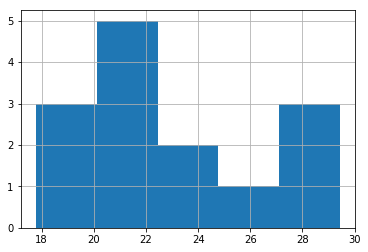

In [82]:
df1.Temperature.hist(bins=5);

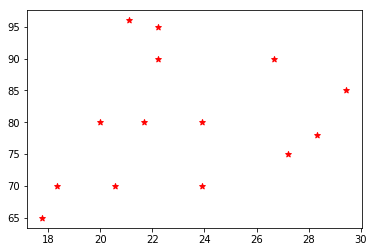

In [83]:
plt.scatter(df1.Temperature, df1.Humidity, marker='*', color='red');